<div style="border:solid green 2px; padding: 20px"> <h1 style="color:green; margin-bottom:20px">Reviewers comment v1</h1>

Hello Olivia!

I'm happy to review your project today 🙌

You can find my comments under the heading **«Review»**. I will categorize my comments in green, blue or red boxes like this:

<div class="alert alert-success">
    <b>Success:</b> if everything is done successfully
</div>
<div class="alert alert-warning">
    <b>Remarks:</b> if I can give some recommendations or ways to improve the project
</div>
<div class="alert alert-danger">
    <b>Needs fixing:</b> if the block requires some corrections. Work cant be accepted with the red comments
</div>

Please don't remove my comments :) If you have any questions don't hesitate to respond to my comments in a different section. 
<div class="alert alert-info"> <b>Student comments:</b> For example like this</div>    



<div style="border:solid green 2px; padding: 20px">
<b>Reviewer's comment v1:</b>

    
<b>Overall Feedback</b>
    
Hello Olivia,
    
You’ve submitted another project—great work! Your commitment to pushing through the challenges of this program is admirable.

After reviewing your submission, I’ve returned it with some feedback to help you make the necessary improvements.
    
   
You can find my more detailed notes within your project notebook in the `Reviewer's comment v1:` section.
   
Keep in mind that revisions are a normal and valuable part of the learning process. Use this feedback to refine your work and resubmit when you’re ready. I know you’re capable of great things, and I’m here to support you every step of the way. Keep going—you’re doing a great job! 🏄

If you find yourself uncertain or in need of further insights, never hesitate to consult with your tutor or ask your questions here. We are here to guide and assist you.

<div style="border:solid green 2px; padding: 20px">
<b>Reviewer's comment v2:</b>
    
<b>Overall Feedback</b> 
    
I appreciate the effort you have put into revising your project.  There are no issues left, so your project has been accepted. I wish you engaging projects in the upcoming sprints! ☘️
    
PS: As a final note, I can recommend cool lectures on stat analysis here: https://www.youtube.com/playlist?list=PL2SOU6wwxB0uwwH80KTQ6ht66KWxbzTIo  
    
Another great self-paced course that covers basic concepts in probability and statistics - Probability and Statistics by Stanford Online or you could check this one [An Introduction to Statistical Learning with Applications in R](https://www.r-bloggers.com/2014/09/in-depth-introduction-to-machine-learning-in-15-hours-of-expert-videos/) 🙌

</div>

# Which one is a better plan?

You work as an analyst for the telecom operator Megaline. The company offers its clients two prepaid plans, Surf and Ultimate. The commercial department wants to know which of the plans brings in more revenue in order to adjust the advertising budget.

You are going to carry out a preliminary analysis of the plans based on a relatively small client selection. You'll have the data on 500 Megaline clients: who the clients are, where they're from, which plan they use, and the number of calls they made and text messages they sent in 2018. Your job is to analyze the clients' behavior and determine which prepaid plan brings in more revenue.

__Objective:__

As a data analyst for Megaline, the goal is to:

1. Determine which prepaid plan—Surf or Ultimate—generates more revenue.
2. Use client data (calls, messages, internet usage) to analyze customer behavior.
3. Recommend adjustments to the advertising budget based on findings.

- For Data Analysis and Cleaning:

* Load and review the datasets for calls, internet, messages, plans, and users.

* Clean, fix, and enrich the data:
     - Previewing structure and basic info
     - Checking and converting date columns
     - Handling missing values
     - Setting correct data types
     - Removing duplicates (if any)
     - Add a month column to each dataframe with usage logs to calculate monthly revenue from each user: call_date in calls, session_date in internet, and message_date in messages
     - Standardize minutes to round up
     - Standardize MB to round up to GB by monthly total

__Study User Behavior:__

* Aggregrate data per user
     - Create monthly comparisons of usage across calls, messages, and internet use and provide visualizations

* Compare plan monthly revenue         

__Test the following hypotheses:__
    - The average revenue from users of Ultimate and Surf calling plans differs.
    - The average revenue from users in NY-NJ area is different from that of the users from other regions.

__Provide insights and feedback to Megaline__ 

<div style="background-color: #d4edda; color: #155724; padding: 15px; border-radius: 4px; border: 1px solid #c3e6cb;">

<b>Reviewer's comment v1</b>
 
Great job keeping the additional information about the project goal! Additionally, you could add a short description of the tasks you plan to perform and the available data. This information could be helpful for the notebook reader.



## Initialization

In [1]:
# Loading all the libraries

In [2]:
import pandas as pd 
import numpy as np   
import matplotlib.pyplot as plt
from scipy import stats as st
import math

## Load data

In [3]:
# Loading data files into different DataFrames

In [4]:
calls = pd.read_csv('/datasets/megaline_calls.csv')

internet = pd.read_csv('/datasets/megaline_internet.csv')

messages = pd.read_csv('/datasets/megaline_messages.csv') 

plans = pd.read_csv('/datasets/megaline_plans.csv') 

users = pd.read_csv('/datasets/megaline_users.csv')


## Prepare the data

In [5]:
# Preview calls df
calls.info()
calls.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22
5,1000_388,1000,2018-12-31,2.20
6,1000_510,1000,2018-12-27,5.75
7,1000_521,1000,2018-12-28,14.18
8,1000_530,1000,2018-12-28,5.77
9,1000_544,1000,2018-12-26,4.40


In [6]:
# Check for nulls or anomalies
print(calls.isnull().sum())

id           0
user_id      0
call_date    0
duration     0
dtype: int64


__Calls DF Summary:__
* Contains call records with user ID, date, duration (in minutes).
* Rows: 137,735 — Each row represents one individual call.
* Columns: 4 total:
    - id — Unique identifier for each call (string).
    - user_id — Identifies the user who made the call (integer).
    - call_date — Date the call was made (object/string; needs to be converted to datetime).
    - duration — Call length in minutes (float - need to round up).
* date is separated by '-'
* No missing values — All columns are complete.

Actions to Take
    - Call_date is stored as a string — should be converted to datetime for time-based grouping.
    - Call duration is in decimal minutes, business rule says all calls are billed by rounding up to the next full minute.

Insights:

* Call behavior: How many calls users make per month and how many total minutes they use.
* Plan comparison: Do Surf users exceed their 500-minute limit more often than Ultimate users?
* Revenue impact: Extra minutes over the limit lead to extra charges—this adds to revenue.

In [7]:
# Convert date columns to datetime
calls['call_date'] = pd.to_datetime(calls['call_date'])

# Add month column for comparison
calls['month'] = calls['call_date'].dt.to_period('M')

In [8]:
# Group number of calls & total minutes per user/month
monthly_calls = calls.groupby(['user_id', 'month']).agg(
    calls_made=('duration', 'count'),
    minutes_used=('duration', 'sum')
).reset_index()

## Internet

In [9]:
# Preview internet df
internet.info()
internet.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22
5,1001_0,1001,2018-08-24,284.68
6,1001_3,1001,2018-12-09,656.04
7,1001_4,1001,2018-11-04,16.97
8,1001_10,1001,2018-11-27,135.18
9,1001_15,1001,2018-12-13,761.92


In [10]:
# Check for nulls
print(internet.isnull().sum())

id              0
user_id         0
session_date    0
mb_used         0
dtype: int64


__Internet DF Summary:__

* 104,825 rows — this is a large dataset.
* Represents internet session data (likely over time).
* 4 columns with no missing values.
  - Columns: id, user_id, session_date, mb_used
* date is separated by '-'
  
Actions to take: 

* Convert session_date to datetime
* Data is logged in MB usage, but Megaline requires GB - round up 

Insights:

* Data usage patterns: Total monthly MB/GB usage.
* Overage behavior: Are users exceeding 15GB (Surf) or 30GB (Ultimate)?
* Usage habits: Is data usage increasing over time? Are younger users heavier data users?
* Revenue opportunity: Data overage charges are higher than minutes or texts.

In [11]:
# Convert date columns to datetime
internet['session_date'] = pd.to_datetime(internet['session_date'])

# Add month column
internet['month'] = internet['session_date'].dt.to_period('M')

In [12]:
# Group total data used per user/month
monthly_internet = internet.groupby(['user_id', 'month']).agg(
    mb_used=('mb_used', 'sum')
).reset_index()

## Messages

In [13]:
# Preview messages df
messages.info()
messages.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26
5,1000_346,1000,2018-12-29
6,1000_386,1000,2018-12-30
7,1000_413,1000,2018-12-31
8,1000_502,1000,2018-12-27
9,1000_525,1000,2018-12-28


In [14]:
# Check for nulls
messages.isnull().sum()

id              0
user_id         0
message_date    0
dtype: int64

__Messages DF Summary:__
* Contains text message records per user by date
* 3 columns: id, user_id, message_date
* 2 object and 1 int64
* date is separated by '-'
* No missing values

Actions to take: 
* Check for duplicates

  
Insights:

* Messaging frequency: Average texts sent per month.
* Under/over usage: Are most users staying under the limit, or do they often go over (50 for Surf, 1000 for Ultimate)?
* Revenue potential: Extra messages are a revenue source for Surf users more than Ultimate ones.

In [15]:
# Convert date columns to datetime
messages['message_date'] = pd.to_datetime(messages['message_date'])

# Add month column
messages['month'] = messages['message_date'].dt.to_period('M')

In [16]:
# Group number of messages per user/month
monthly_messages = messages.groupby(['user_id', 'month']).agg(
    messages_sent=('id', 'count')
).reset_index()

## Plans

In [17]:
# Preview plans df
plans.info()
plans.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


In [18]:
# Print the general/summary information about the plans' DataFrame

plans.info(show_counts=True)
plans.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


In [19]:
# Check for nulls
print(plans.isnull().sum())

messages_included        0
mb_per_month_included    0
minutes_included         0
usd_monthly_pay          0
usd_per_gb               0
usd_per_message          0
usd_per_minute           0
plan_name                0
dtype: int64


__Plans DF Summary:__
* Contains details about each plan: limits and rates.
* 2 rows, indexed by plan names: 'surf' and 'ultimate'.
* 7 columns of plan parameters like included messages, data limits, and pricing.
* All columns are complete (no missing values).

Data Types: 
* int64 for counts and prices (e.g., messages included, GB included, monthly price).
* float64 for per-unit costs (e.g., cost per message or minute).

Actions to Take:
* Set plan_name as the index
* Check for duplicates.
* Note MG vs. GB

Insights:

* Will use this DataFrame to:
    - Calculate monthly revenue per user.
    - Model how going over limits impacts revenue.
    - Compare cost-efficiency: Is Ultimate overpriced relative to usage?

## Users

In [20]:
# Preview Users DF
users.info()
users.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN
5,1005,Livia,Shields,31,"Dallas-Fort Worth-Arlington, TX MSA",2018-11-29,surf,NaN
6,1006,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",2018-11-27,ultimate,2018-12-18
7,1007,Eusebio,Welch,42,"Grand Rapids-Kentwood, MI MSA",2018-07-11,surf,NaN
8,1008,Emely,Hoffman,53,"Orlando-Kissimmee-Sanford, FL MSA",2018-08-03,ultimate,NaN
9,1009,Gerry,Little,19,"San Jose-Sunnyvale-Santa Clara, CA MSA",2018-04-22,surf,NaN


In [21]:
# check for null values
print(users.isnull().sum())

user_id         0
first_name      0
last_name       0
age             0
city            0
reg_date        0
plan            0
churn_date    466
dtype: int64


__Users DF Summary:__

* 500 rows, each representing one user.
* 8 columns, containing user-specific data.
* No missing values in most columns — except for churn_date.
* Contains:
  - Client info: user ID, name, age, city, registration/churn date, and plan.

Actions to take: 
* Convert reg_date and churn_date (strings) to datetime using pd.to_datetime()
* Explore missing values from churn_date column


Insights:

* Demographics: Average age of clients, distribution across cities.
* Churn analysis: Who has left the service (churn_date is not null)? Are churn rates higher in one plan or city?
* Plan popularity: How many users are on each plan?
* Customer base trends: When did most users join?

In [22]:
# Display rows where column has missing values
display(users.isna().sum())#[users['churn_date'].isna()]

# Drop column with missing values, as info is not pertinent to project output
users.dropna(axis=1, inplace=True)

display(users.isna().sum())

user_id         0
first_name      0
last_name       0
age             0
city            0
reg_date        0
plan            0
churn_date    466
dtype: int64

user_id       0
first_name    0
last_name     0
age           0
city          0
reg_date      0
plan          0
dtype: int64

## Calls

In [23]:
# Print the general/summary information about the calls' DataFrame

calls.sample(5)

,id,user_id,call_date,duration,month
73025,1259_21,1259,2018-12-28,4.33,2018-12
102474,1363_87,1363,2018-09-24,6.58,2018-09
4495,1019_4,1019,2018-12-30,8.67,2018-12
70377,1251_388,1251,2018-12-08,8.02,2018-12
69896,1250_126,1250,2018-10-03,17.29,2018-10


In [24]:
# Print a sample of data for calls

calls.head(10)

,id,user_id,call_date,duration,month
0,1000_93,1000,2018-12-27,8.52,2018-12
1,1000_145,1000,2018-12-27,13.66,2018-12
2,1000_247,1000,2018-12-27,14.48,2018-12
3,1000_309,1000,2018-12-28,5.76,2018-12
4,1000_380,1000,2018-12-30,4.22,2018-12
5,1000_388,1000,2018-12-31,2.20,2018-12
6,1000_510,1000,2018-12-27,5.75,2018-12
7,1000_521,1000,2018-12-28,14.18,2018-12
8,1000_530,1000,2018-12-28,5.77,2018-12
9,1000_544,1000,2018-12-26,4.40,2018-12


<div style="background-color: #fff3cd; color: #856404; padding: 15px; border-radius: 4px; border: 1px solid #ffeeba;">

<b>Reviewer's comment v1:</b>
    
Please don't forget to use head, tail or sample when showing dataframes. If you leave this table "as is", then when you save the notebook, for example, on github, the table will expand to its full length and take up a significant part of the report.

- Calls duration needs to be rounded up to the nearest minute

### Fix data

In [25]:
# rounding up call duration to nearest minute
calls['duration'] =  np.ceil(calls['duration'])

calls.sample(5)


,id,user_id,call_date,duration,month
49423,1179_82,1179,2018-12-16,2.0,2018-12
113645,1399_269,1399,2018-12-14,0.0,2018-12
54465,1196_350,1196,2018-07-01,0.0,2018-07
87658,1321_398,1321,2018-06-23,14.0,2018-06
37211,1141_60,1141,2018-11-26,8.0,2018-11


<div style="background-color: #d4edda; color: #155724; padding: 15px; border-radius: 4px; border: 1px solid #c3e6cb;">

<b>Reviewer's comment v1:</b>

    
Great job! Good that you did not forget about data rounding. Also, great choice of `np.ceil ()` function 👏

### Enrich data

- I did this by converting to datetime and creating a month column for better comparison

## Messages

In [26]:
# Print the general/summary information about the messages' DataFrame

messages.head(10)

,id,user_id,message_date,month
0,1000_125,1000,2018-12-27,2018-12
1,1000_160,1000,2018-12-31,2018-12
2,1000_223,1000,2018-12-31,2018-12
3,1000_251,1000,2018-12-27,2018-12
4,1000_255,1000,2018-12-26,2018-12
5,1000_346,1000,2018-12-29,2018-12
6,1000_386,1000,2018-12-30,2018-12
7,1000_413,1000,2018-12-31,2018-12
8,1000_502,1000,2018-12-27,2018-12
9,1000_525,1000,2018-12-28,2018-12


### Enrich data

- I did this by converting to datetime and creating a month column for better comparison

## Internet

In [27]:
# Print a sample of data for the internet traffic

internet.sample(5)

,id,user_id,session_date,mb_used,month
64492,1296_14,1296,2018-11-29,0.00,2018-11
22034,1100_238,1100,2018-08-30,69.92,2018-08
953,1006_24,1006,2018-12-04,124.78,2018-12
3876,1022_287,1022,2018-11-09,367.56,2018-11
13877,1064_325,1064,2018-10-01,75.57,2018-10


### Enrich data

- I did this by converting to datetime and creating a month column for better comparison

## Study plan conditions

PLAN CONDITIONS:

1. Surf:

* Monthly charge: 20 USD
* 500 monthly minutes, 50 texts, and 15 GB of data
* After exceeding the package limits:
  - 1 minute: 3 cents
  - 1 text message: 3 cents
  - 1 GB of data: $10

2. Ultimate:

* Monthly charge: 70 USD
* 3000 monthly minutes, 1000 text messages, and 30 GB of data
* After exceeding the package limits:
 - 1 minute: 1 cent
 - 1 text message: 1 cent
 - 1 GB of data: $7


In [28]:
# Print out the plan conditions and make sure they are clear for you

display(plans)

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


<div style="background-color: #d4edda; color: #155724; padding: 15px; border-radius: 4px; border: 1px solid #c3e6cb;">

<b>Reviewer's comment v1:</b>
    
Everything is correct here 💫

## Aggregate data per user


In [29]:
# Calculate the number of calls made & total minutes used by each user per month. Save the result.

monthly_calls = calls.groupby(['user_id', 'month']).agg({
    'id': 'count',
    'duration': 'sum'
}).reset_index()

# Clean up column names
monthly_calls.columns = ['user_id', 'month', 'calls_made', 'total_minutes']
monthly_calls.head(10)

,user_id,month,calls_made,total_minutes
0,1000,2018-12,16,124.0
1,1001,2018-08,27,182.0
2,1001,2018-09,49,315.0
3,1001,2018-10,65,393.0
4,1001,2018-11,64,426.0
5,1001,2018-12,56,412.0
6,1002,2018-10,11,59.0
7,1002,2018-11,55,386.0
8,1002,2018-12,47,384.0
9,1003,2018-12,149,1104.0


<div style="background-color: #fff3cd; color: #856404; padding: 15px; border-radius: 4px; border: 1px solid #ffeeba;">

<b>Reviewer's comment v1:</b>
    
In `pivot_table` or `groupby` it is possible to pass multiple arguments, so here, you can create an aggregated table in one go like this:


```
# Group by and aggregate
result = calls_df.groupby(['user_id', 'month']).agg({'duration': ['count', 'sum']}).reset_index()

# Flatten the MultiIndex in columns
result.columns = ['_'.join(col).strip() if type(col) is tuple else col for col in result.columns.values]
result
```

In [30]:
# Calculate the amount of minutes spent by each user per month. Save the result.

# Group by user_id and month, and sum the rounded durations
monthly_minutes = calls.groupby(['user_id', 'month']).agg(
    total_minutes=('duration', 'sum')
).reset_index()

monthly_minutes.head(10)

,user_id,month,total_minutes
0,1000,2018-12,124.0
1,1001,2018-08,182.0
2,1001,2018-09,315.0
3,1001,2018-10,393.0
4,1001,2018-11,426.0
5,1001,2018-12,412.0
6,1002,2018-10,59.0
7,1002,2018-11,386.0
8,1002,2018-12,384.0
9,1003,2018-12,1104.0


In [31]:
# Calculate the number of messages sent by each user per month. Save the result.
monthly_messages = messages.groupby(['user_id', 'month'])['id'].count().reset_index()
monthly_messages.rename(columns={'id': 'messages'}, inplace=True)

In [32]:
# Calculate the volume of internet traffic used by each user per month. Save the result.

internet_agg = internet.groupby(['user_id', 'month']).sum().reset_index()

# Round MG up to GB
internet_agg['gb_used'] = np.ceil(internet_agg['mb_used']/1024)
internet_agg.sample(10)

,user_id,month,mb_used,gb_used
1457,1318,2018-12,19730.76,20.0
1976,1424,2018-11,3940.50,4.0
2263,1498,2018-03,19744.34,20.0
1488,1324,2018-12,16354.39,16.0
1902,1407,2018-11,290.06,1.0
541,1114,2018-10,15846.17,16.0
1106,1236,2018-04,15603.83,16.0
35,1009,2018-11,25473.43,25.0
416,1087,2018-12,12425.47,13.0
664,1140,2018-09,14411.51,15.0


In [33]:
# aggregate data per user by month
print(monthly_calls.columns)
print(monthly_messages.columns)
print(internet_agg.columns)

Index(['user_id', 'month', 'calls_made', 'total_minutes'], dtype='object')
Index(['user_id', 'month', 'messages'], dtype='object')
Index(['user_id', 'month', 'mb_used', 'gb_used'], dtype='object')


In [34]:
# Merge the data for calls, minutes, messages, internet based on user_id and month

# Merge calls_agg and messages_agg
merged_monthly_usage = monthly_calls.merge(monthly_messages, on=['user_id', 'month'], how='outer')

# Merge the result with internet_agg
merged_monthly_usage = merged_monthly_usage.merge(internet_agg, on=['user_id', 'month'], how='outer')

# Fill missing values with 0 (in case some users didn’t use one of the services that month)
merged_monthly_usage.fillna(0, inplace=True)

# Make sure dtype is consistent for calculations
merged_monthly_usage[['calls_made', 'messages', 'mb_used']] = merged_monthly_usage[['calls_made', 'messages', 'mb_used']].astype(int)

# Preview
merged_monthly_usage.head()

,user_id,month,calls_made,total_minutes,messages,mb_used,gb_used
0,1000,2018-12,16,124.0,11,1901,2.0
1,1001,2018-08,27,182.0,30,6919,7.0
2,1001,2018-09,49,315.0,44,13314,14.0
3,1001,2018-10,65,393.0,53,22330,22.0
4,1001,2018-11,64,426.0,36,18504,19.0


<div style="background-color: #d4edda; color: #155724; padding: 15px; border-radius: 4px; border: 1px solid #c3e6cb;">

<b>Reviewer's comment v1:</b>
    
Everything is correct here. Indeed, we need to use either `how=outer` or `concat` join here.

__Plan Information__

Usage columns:
* minutes_used (the total minutes used in a month)
* messages (the total text messages sent in a month)
* mb_used (the total megabytes used in a month)

Plan details (merged in from your users/plan DataFrames):
* minutes_included (free minutes provided by the plan)
* messages_included (free text messages)
* mb_per_month_included (free megabytes included)
* usd_monthly_pay (the base monthly fee)
* usd_per_minute (cost per additional minute)
* usd_per_message (cost per extra text message)
* usd_per_gb (cost per extra gigabyte of data)

In [35]:
merged_monthly_usage.isnull().sum()

user_id          0
month            0
calls_made       0
total_minutes    0
messages         0
mb_used          0
gb_used          0
dtype: int64

In [36]:
plans

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


In [37]:
users.head()

,user_id,first_name,last_name,age,city,reg_date,plan
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf


In [38]:
# Calculate the monthly revenue for each user

# Merge user plan info into merged_monthly_usage
merged_monthly_usage = merged_monthly_usage.merge(users[['user_id', 'plan']], on='user_id', how='left')
merged_monthly_usage = merged_monthly_usage.merge(plans, left_on='plan', right_on='plan_name', how='left')

In [39]:
# Convert free MB to GB (rounded up)
free_gb = np.ceil(merged_monthly_usage['mb_per_month_included'] / 1024)

# Calculate overages (negative values become 0)
extra_minutes = (merged_monthly_usage['total_minutes'] - merged_monthly_usage['minutes_included']).clip(lower=0)
extra_messages = (merged_monthly_usage['messages'] - merged_monthly_usage['messages_included']).clip(lower=0)
extra_gb = (merged_monthly_usage['gb_used'] - free_gb).clip(lower=0)

# Calculate revenue directly
merged_monthly_usage['monthly_revenue'] = (
    merged_monthly_usage['usd_monthly_pay'] +
    extra_minutes * merged_monthly_usage['usd_per_minute'] +
    extra_messages * merged_monthly_usage['usd_per_message'] +
    extra_gb * merged_monthly_usage['usd_per_gb']
)
# Preview result
print(merged_monthly_usage[['user_id', 'month', 'plan', 'monthly_revenue']].head())

   user_id    month      plan  monthly_revenue
0     1000  2018-12  ultimate            70.00
1     1001  2018-08      surf            20.00
2     1001  2018-09      surf            20.00
3     1001  2018-10      surf            90.09
4     1001  2018-11      surf            60.00


<div style="background-color: #d4edda; color: #155724; padding: 15px; border-radius: 4px; border: 1px solid #c3e6cb;">

<b>Reviewer's comment v1:</b>

Everything is correct here. Great that you've created a function to calculate revenue.

Btw it is also possible to make the calculation of revenue a bit different `np.where` - https://numpy.org/doc/stable/reference/generated/numpy.where.html
    
```
np.where ('condition: if exceeding the package limit', 'multiply the difference by the price of additional services', '0')
```

    
Great thing about python is that there are so many libraries and ready-to-use functions. For example, this task can also be solved using `.clip()` (a useful method in many tasks). You can read it here: https://www.pythonpool.com/numpy-clip/
 

__Revenue Observations:__

- users on the ultimate plan have one flat fee of $70 USD annually (Dec.) and no variation in charges
- users on the surf plan have fluctuating charges varrying month to month

In summary: users on the surf plan may fluctuate in usage, often incurring overage fees, while ultimate plan users tend to have more predictable, capped costs.

__Business Potential:__

* User 1001 would have saved money by switching to the ultimate plan, which costs $70 but offers much higher allowances - based on October and November, this user paid more than or almost as much as the ultimate plan’s fixed rate.
 - If their high usage continues, upgrading would reduce their cost.

* Suggestion: potential to target user 1001 with an upsell to the ultimate plan based on past overages. 

__Plan Revenue Contribution:__
* The ultimate plan ensures consistent high revenue.
* The surf plan generates less base revenue, but can lead to higher total revenue from overages.

Megaline’s lower-tier plan can result in more total revenue if users frequently exceed limits — though this may affect customer satisfaction.

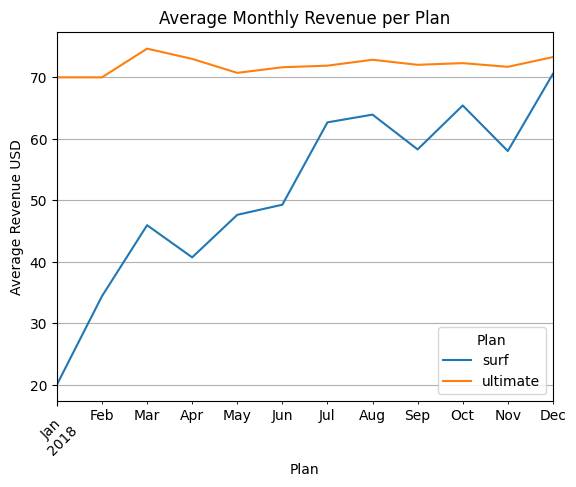

In [40]:
# Visualization of monthly revenue per plan

merged_monthly_usage.pivot_table(index = 'plan', columns = 'month', values = 'monthly_revenue', aggfunc = 'mean').T.plot()

plt.title('Average Monthly Revenue per Plan')
plt.xlabel('Plan')
plt.ylabel('Average Revenue USD')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(title='Plan')
plt.show()

## Study user behaviour

[Calculate some useful descriptive statistics for the aggregated and merged data, which typically reveal an overall picture captured by the data. Draw useful plots to help the understanding. Given that the main task is to compare the plans and decide on which one is more profitable, the statistics and the plots should be calculated on a per-plan basis.]

[There are relevant hints in the comments for Calls but they are not provided for Messages and Internet though the principle of statistical study is the same for them as for Calls.]

### Calls

In [41]:
merged_monthly_usage.columns

Index(['user_id', 'month', 'calls_made', 'total_minutes', 'messages',
       'mb_used', 'gb_used', 'plan', 'messages_included',
       'mb_per_month_included', 'minutes_included', 'usd_monthly_pay',
       'usd_per_gb', 'usd_per_message', 'usd_per_minute', 'plan_name',
       'monthly_revenue'],
      dtype='object')

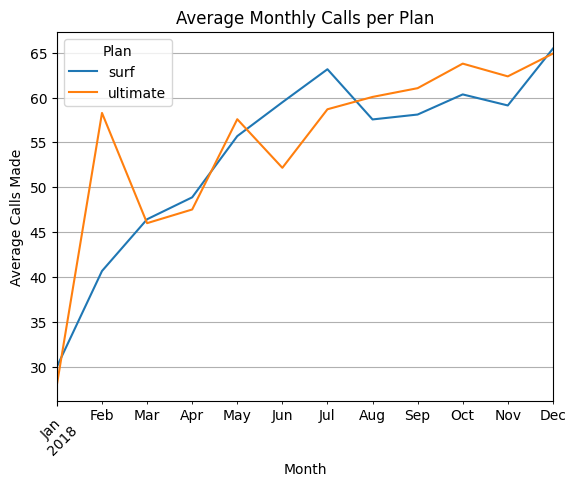

In [42]:
# Visualize average calls made per month per plan
merged_monthly_usage.pivot_table(index = 'plan', columns = 'month', values = 'calls_made', aggfunc = 'mean').T.plot()

plt.title('Average Monthly Calls per Plan')
plt.xlabel('Month')
plt.ylabel('Average Calls Made')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(title = 'Plan')
plt.show()


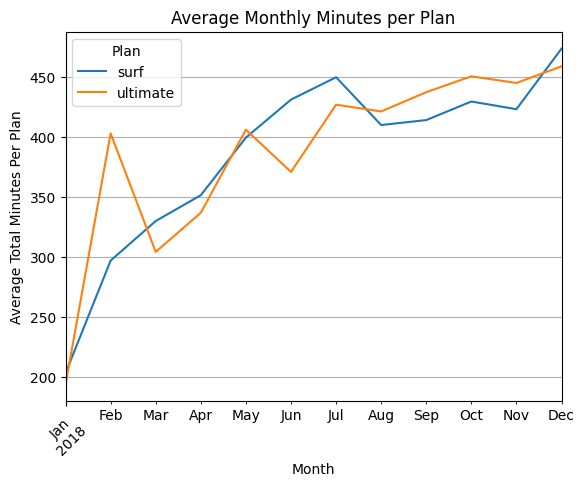

In [43]:
# Visualization for average total minutes per month per plan
merged_monthly_usage.pivot_table(index = 'plan', columns = 'month', values = 'total_minutes', aggfunc = 'mean').T.plot()

plt.title('Average Monthly Minutes per Plan')
plt.xlabel('Month')
plt.ylabel('Average Total Minutes Per Plan')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(title = 'Plan')
plt.show()

__Plot for average monthly calls shows:__ 
* Surf plan users calls have an initial spike in the first month, a large dip over February and March, then a gradual uptick with some dips across the remaining months.
* Ultimate plan users have a more gradual incline of calls per month across the span of 12 months.

__Insights:__
* Neither plan exceeds 500 minutes of calls per month
* Maybe the data usage is where most of the revenue comes from

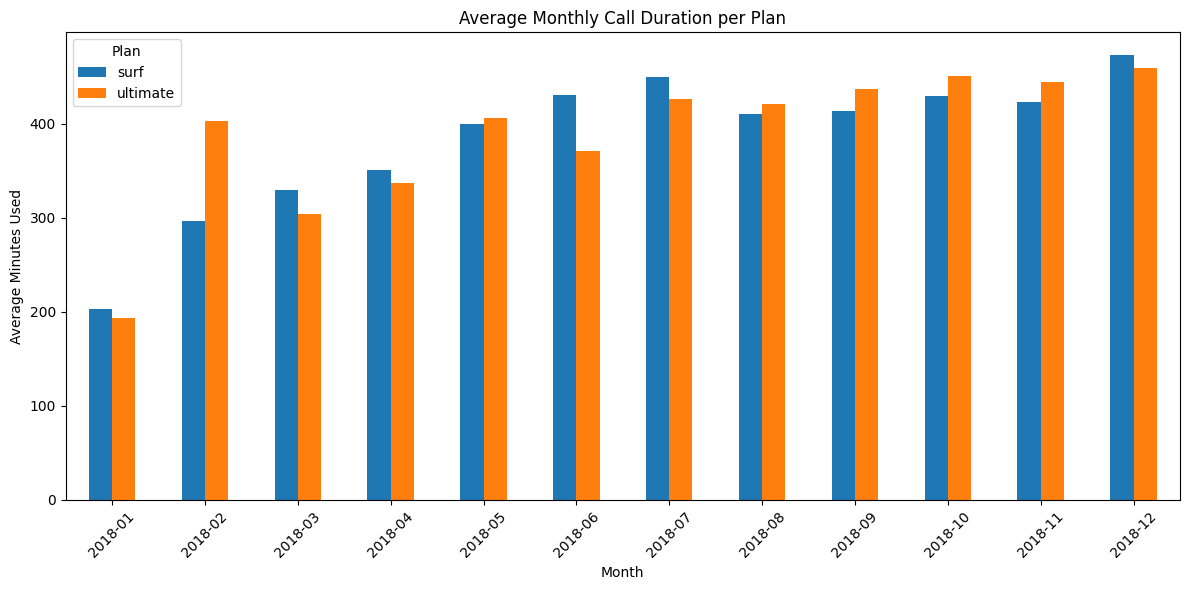

In [44]:
# Compare average duration of calls per each plan per each distinct month. Plot a bar plot to visualize it.

# Group by plan and month, calculate mean call duration
avg_call_duration = (merged_monthly_usage.groupby(['plan', 'month'])['total_minutes'].mean().reset_index())

# Pivot the table: index=month, columns=plan, values=avg minutes
pivot_table = avg_call_duration.pivot(index='month', columns='plan', values='total_minutes')

# Plot as a grouped bar chart
pivot_table.plot(kind='bar', figsize=(12, 6))

plt.title('Average Monthly Call Duration per Plan')
plt.xlabel('Month')
plt.ylabel('Average Minutes Used')
plt.xticks(rotation=45)
plt.legend(title='Plan')
plt.tight_layout()
plt.show()

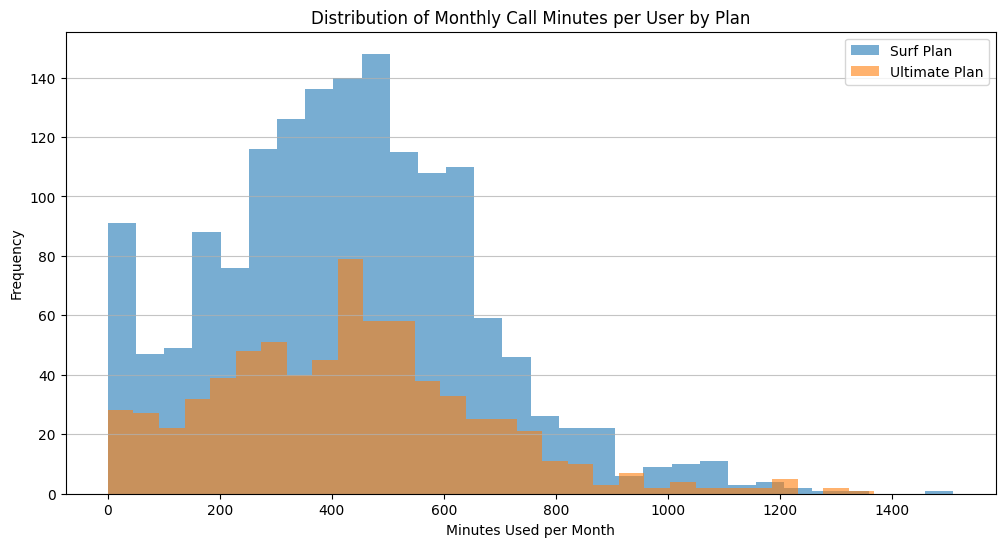

In [45]:
# Compare the number of minutes users of each plan require each month. Plot a histogram.

# Filter data by plan
surf_minutes = merged_monthly_usage[merged_monthly_usage['plan'] == 'surf']['total_minutes']
ultimate_minutes = merged_monthly_usage[merged_monthly_usage['plan'] == 'ultimate']['total_minutes']

plt.figure(figsize=(12,6))

# Plot histograms for each plan
plt.hist(surf_minutes, bins=30, alpha=0.6, label='Surf Plan')
plt.hist(ultimate_minutes, bins=30, alpha=0.6, label='Ultimate Plan')

plt.title('Distribution of Monthly Call Minutes per User by Plan')
plt.xlabel('Minutes Used per Month')
plt.ylabel('Frequency')
plt.legend()
plt.grid(axis='y', alpha=0.75)
plt.show()


From the histogram of monthly call minutes per user by plan: 

- Surf Plan users form the majority and most frequently use between 400–600 minutes per month. This suggests they hover just below or around the plan’s 500-minute monthly limit.
  * This group likely values the low $20 base price, but many may be incurring overage charges for calls, especially since even a one-second call counts as a full minute.

- Ultimate Plan users show a flatter, more varied usage pattern, including some with very low usage and others over 1000 minutes; this still falls within their 3000-minute allowance.
  * This indicates the Ultimate Plan attracts not just heavy users, but also customers who may prioritize predictable billing and larger text/data limits.

- Overlap in Usage:
  * Many users across both plans fall between 200–800 minutes/month. 
  * Users around 600+ minutes/month on Surf are likely paying more than they realize in overage fees.
  * Heavy Call Users (1000+ minutes) exist on both plans, but Surf has more due to higher enrollment. These users may be overpaying significantly under Surf’s 3¢/minute overage versus Ultimate’s 1¢.

[Calculate the mean and the variable of the call duration to reason on whether users on the different plans have different behaviours for their calls.]

In [46]:
# Calculate the mean and the variance of the monthly call duration

call_duration_stats = merged_monthly_usage.groupby('plan')['total_minutes'].agg(['mean', 'var']).round(2)

print("Mean and Variance of Monthly Call Duration by Plan:")
call_duration_stats

Mean and Variance of Monthly Call Duration by Plan:


,mean,var
plan,,
surf,428.75,54968.28
ultimate,430.45,57844.46


__Insights:__

The average usage is almost the same:
* Surf: 428.75 minutes
* Ultimate: 430.45 minutes

Variance:
* Ultimate Plan users have slightly higher variance (57,844.46) than Surf users (54,968.28).
  - Suggests that some users talk a lot, and others talk very little, which is surprising, since Ultimate includes way more minutes. You could expect those users to talk much more—but they don’t.

Summary: Most users talk about the same amount, no matter which plan they’re on. But some Ultimate users talk a lot more or less than others, while Surf users are more consistent. This might mean Surf users are managing their usage more carefully to avoid extra charges.

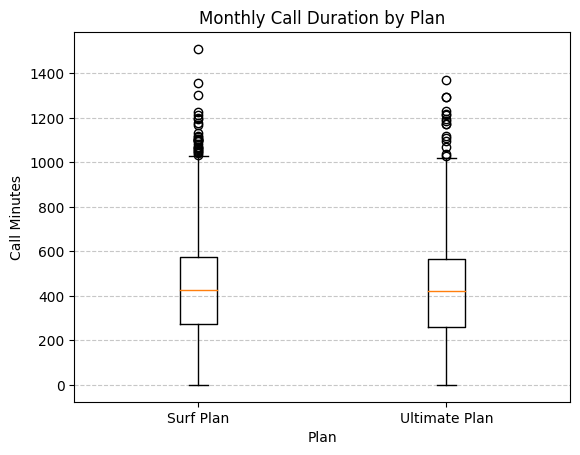

In [47]:
# Plot a boxplot to visualize the distribution of the monthly call duration

#Separate minutes by plan
surf_minutes = merged_monthly_usage[merged_monthly_usage['plan'] == 'surf']['total_minutes']
ultimate_minutes = merged_monthly_usage[merged_monthly_usage['plan'] == 'ultimate']['total_minutes']


# Plot boxplot for side by side comparison
plt.boxplot([surf_minutes, ultimate_minutes],
            labels=['Surf Plan', 'Ultimate Plan'])  # Labels for each of the boxes

plt.title('Monthly Call Duration by Plan')
plt.xlabel('Plan')
plt.ylabel('Call Minutes')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

Based on the boxplot and histogram, call usage is consistent across both plans. The median call minutes are about the same for users on both plans, and the interquartile range (representing the middle 50% of users) is also very similar for both plans. Some users on both plans make 1000+ calls, but this is not the bulk. So plan choice may be driven more by price sensitivity, text/data needs, or desire for predictable billing—not calling behavior.

<div style="background-color: #d4edda; color: #155724; padding: 15px; border-radius: 4px; border: 1px solid #c3e6cb;">
 
<b>Reviewer's comment v1:</b>
    
Great analysis! Like the structure and that you've used different types of charts to check data. 

### Messages

In [48]:
# Compare the number of messages users of each plan tend to send each month

# Group by plan and calculate mean and variance of messages
message_stats = merged_monthly_usage.groupby('plan')['messages'].agg(['mean', 'var']).round(2) # round decimal to read more easily

print("Average and Variance of Monthly Messages by Plan:")
message_stats

Average and Variance of Monthly Messages by Plan:


,mean,var
plan,,
surf,31.16,1126.72
ultimate,37.55,1208.76


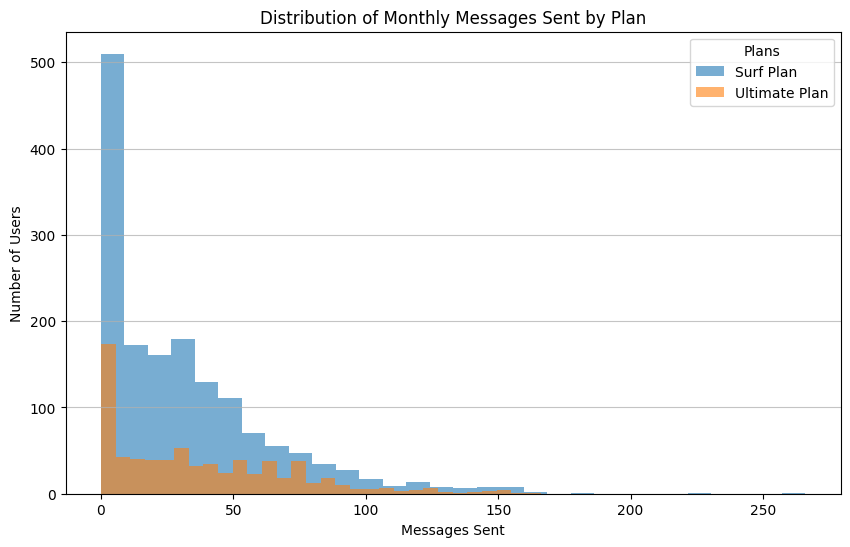

In [49]:
# Histogram of message usage by plan per user per month

# Filter by plan
surf_messages = merged_monthly_usage[merged_monthly_usage['plan'] == 'surf']['messages']
ultimate_messages = merged_monthly_usage[merged_monthly_usage['plan'] == 'ultimate']['messages']

# Plot histogram
plt.figure(figsize=(10, 6))
plt.hist(surf_messages, bins=30, alpha=0.6, label='Surf Plan')
plt.hist(ultimate_messages, bins=30, alpha=0.6, label='Ultimate Plan')

plt.title('Distribution of Monthly Messages Sent by Plan')
plt.xlabel('Messages Sent')
plt.ylabel('Number of Users')
plt.legend(title = 'Plans')
plt.grid(axis='y', alpha=0.75)
plt.show()

Users on both plans send relatively few messages per month:
Surf users average 31 messages.
Ultimate users average 38 messages.
The difference is small, meaning most users don’t send many texts, regardless of plan.
Surf users generally stay under their 50-message limit:
With an average of 31, most Surf users are not paying extra for texts.
A few likely go over occasionally, but not by much.
Ultimate users barely use their 1000-message allowance:
They send just 38 messages on average — less than 4% of what the plan includes.
This suggests that many Ultimate users don’t need that many texts, and may be overpaying.
Messaging behavior is nearly the same across plans:
The similar averages and variances show that users’ texting habits don’t really change based on which plan they have.

In [50]:
# Compare the amount of internet traffic consumed by users per plan
# Group by plan and calculate average and variance of internet usage
internet_stats = merged_monthly_usage.groupby('plan')['gb_used'].agg(['mean', 'var']).round(2) # round decimal to read more easily

print("Average and Variance of Monthly Internet Usage (GB) by Plan:")
internet_stats

Average and Variance of Monthly Internet Usage (GB) by Plan:


,mean,var
plan,,
surf,16.67,61.58
ultimate,17.31,58.83


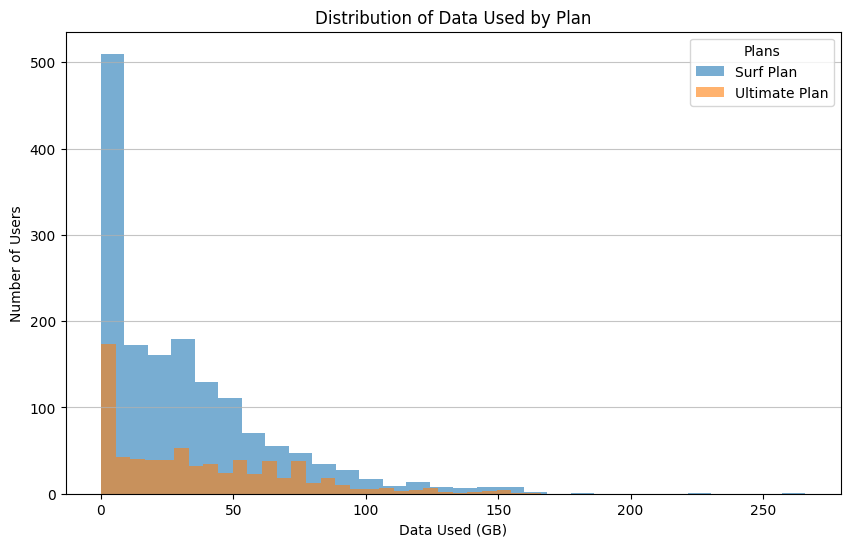

In [51]:
surf_data = merged_monthly_usage[merged_monthly_usage['plan'] == 'surf']['gb_used']
ultimate_data = merged_monthly_usage[merged_monthly_usage['plan'] == 'ultimate']['gb_used']

# Plot histogram
plt.figure(figsize=(10, 6))
plt.hist(surf_messages, bins=30, alpha=0.6, label='Surf Plan')
plt.hist(ultimate_messages, bins=30, alpha=0.6, label='Ultimate Plan')

# Labels and title
plt.title('Distribution of Data Used by Plan')
plt.xlabel('Data Used (GB)')
plt.ylabel('Number of Users')
plt.legend(title = 'Plans')
plt.grid(axis='y', alpha=0.75)
plt.show()

## Revenue

In [52]:
# Convert MB to GB (rounded up as per Megaline policy)
merged_monthly_usage['gb_used'] = (merged_monthly_usage['mb_used'] / 1024).apply(np.ceil)

# Mask for each plan
surf = merged_monthly_usage['plan'] == 'surf'
ultimate = merged_monthly_usage['plan'] == 'ultimate'

# Empty column for revenue
merged_monthly_usage['revenue'] = 0

In [53]:
# Calc revenue for surf users
surf_revenue = merged_monthly_usage.loc[surf, 'revenue'] = (
    20 + 
    np.maximum(0, merged_monthly_usage.loc[surf, 'total_minutes'] - 500) * 0.03 +
    np.maximum(0, merged_monthly_usage.loc[surf, 'messages'] - 50) * 0.03 +
    np.maximum(0, merged_monthly_usage.loc[surf, 'gb_used'] - 15) * 10
)

# calc revenue for ultimate users
ultimate_revenue = merged_monthly_usage.loc[ultimate, 'revenue'] = (
    70 +
    np.maximum(0, merged_monthly_usage.loc[ultimate, 'total_minutes'] - 3000) * 0.01 +
    np.maximum(0, merged_monthly_usage.loc[ultimate, 'messages'] - 1000) * 0.01 +
    np.maximum(0, merged_monthly_usage.loc[ultimate, 'gb_used'] - 30) * 7
)

In [54]:
# Get revenue stats per plan
revenue_stats = merged_monthly_usage.groupby('plan')['revenue'].agg(['mean', 'median', 'var', 'min', 'max']).round(2)

print("Monthly Revenue Statistics by Plan:")
revenue_stats

Monthly Revenue Statistics by Plan:


,mean,median,var,min,max
plan,,,,,
surf,60.69,40.36,3066.37,20.0,590.37
ultimate,72.31,70.00,129.85,70.0,182.00


This provides:
1. Average revenue per user per month.
2. Variance (how much users' monthly payments (revenue) vary from the average).
3. Which users are overpaying due to overages (by exploring max values).

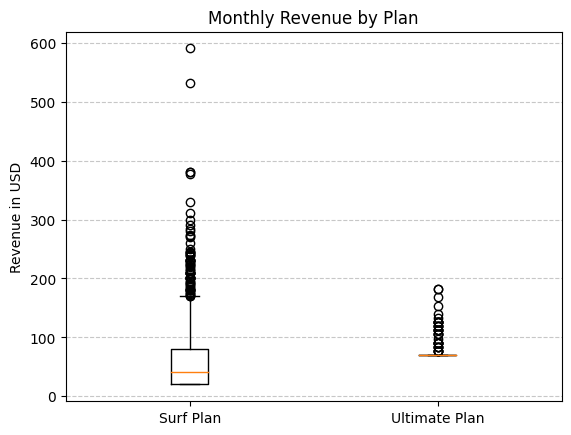

In [55]:
# Use boxplot to compare revenue stats per plan - better to see side by side distribution
plt.boxplot([surf_revenue, ultimate_revenue], labels=['Surf Plan', 'Ultimate Plan'])
plt.title('Monthly Revenue by Plan')
plt.ylabel('Revenue in USD')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

[Formulate conclusions about how the revenue differs between the plans.]

__Revenue Observations:__

- users on the ultimate plan have one flat fee of $70 USD annually (Dec.) and no variation in charges
- users on the surf plan have fluctuating charges varrying month to month

In summary: users on the surf plan may fluctuate in usage, often incurring overage fees, while ultimate plan users tend to have more predictable, capped costs.

__Business Potential:__

* User 1001 would have saved money by switching to the ultimate plan, which costs $70 but offers much higher allowances - based on October and November, this user paid more than or almost as much as the ultimate plan’s fixed rate.
 - If their high usage continues, upgrading would reduce their cost.

* Suggestion: potential to target user 1001 with an upsell to the ultimate plan based on past overages. 

__Plan Revenue Contribution:__
* The ultimate plan ensures consistent high revenue.
* The surf plan generates less base revenue, but can lead to higher total revenue from overages.

Megaline’s lower-tier plan can result in more total revenue if users frequently exceed limits — though this may affect customer satisfaction.

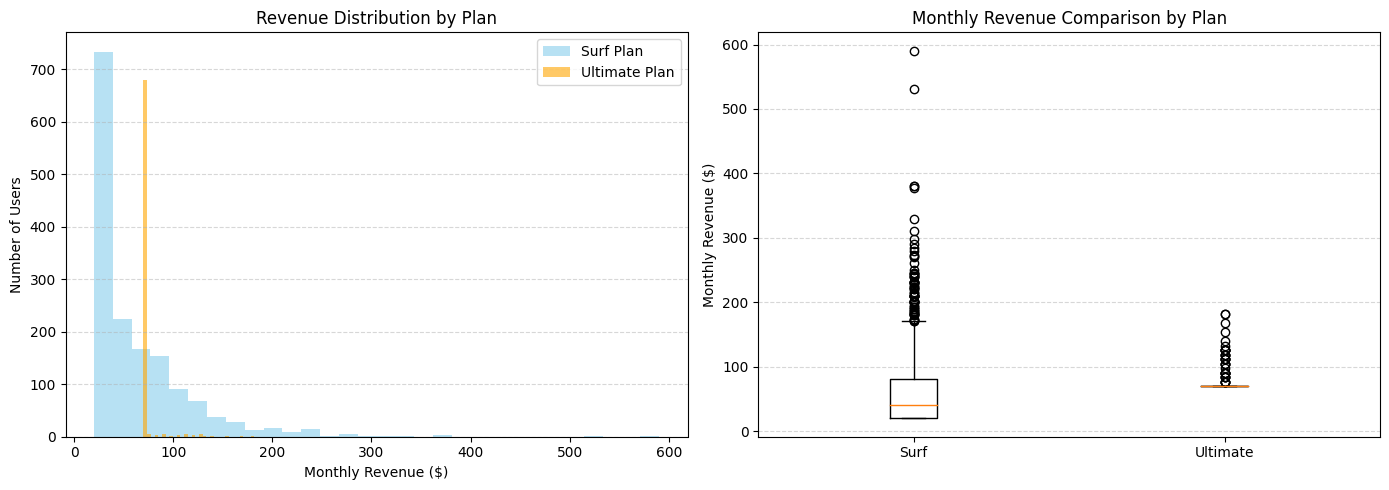

In [56]:
# Separate revenue by plan
surf_revenue = merged_monthly_usage[merged_monthly_usage['plan'] == 'surf']['monthly_revenue']
ultimate_revenue = merged_monthly_usage[merged_monthly_usage['plan'] == 'ultimate']['monthly_revenue']

# Create 1 row, 2 columns of subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histogram (left)
axes[0].hist(surf_revenue, bins=30, alpha=0.6, label='Surf Plan', color='skyblue')
axes[0].hist(ultimate_revenue, bins=30, alpha=0.6, label='Ultimate Plan', color='orange')
axes[0].set_title('Revenue Distribution by Plan')
axes[0].set_xlabel('Monthly Revenue ($)')
axes[0].set_ylabel('Number of Users')
axes[0].legend()
axes[0].grid(axis='y', linestyle='--', alpha=0.5)

# Boxplot (right)
axes[1].boxplot([surf_revenue, ultimate_revenue], labels=['Surf', 'Ultimate'])
axes[1].set_title('Monthly Revenue Comparison by Plan')
axes[1].set_ylabel('Monthly Revenue ($)')
axes[1].grid(axis='y', linestyle='--', alpha=0.5)

# Display the combined plot
plt.tight_layout()
plt.show()

<div style="background-color: #d4edda; color: #155724; padding: 15px; border-radius: 4px; border: 1px solid #c3e6cb;">

<b>Reviewer's comment v1:</b>
    
I will write overall thoughts about the data analysis section:
- Very nice visualization of the data. It's great that you combined both plans in one graph for comparison and also used different graph types to check the available data.
- If you have time and are willing to practice, you can display two charts (a histogram and a boxplot) using a two-column subplot.

```
    # Create one row with 2 columns
	  fig, axes = plt.subplots(1, 2, figsize=(16, 5))

	  # Create a histogram for the surf plan
	  sns.distplot(... ax=axes[0])
	  # Create a histogram for the second plan
	  sns.distplot(... ax=axes[0])
	
	  # Create a boxplot for both plans
	  sns.boxplot(... ax=axes[1])
```

## Internet

In [57]:
# Compare the number of GB users of each plan tend to use each month

# Group by plan and calculate mean and variance of monthly internet usage (in GB)
data_stats = merged_monthly_usage.groupby('plan')['gb_used'].agg(['mean', 'var']).round(2)

print("Average and Variance of Monthly Internet Usage by Plan (GB):")
data_stats

Average and Variance of Monthly Internet Usage by Plan (GB):


,mean,var
plan,,
surf,16.67,61.59
ultimate,17.31,58.83


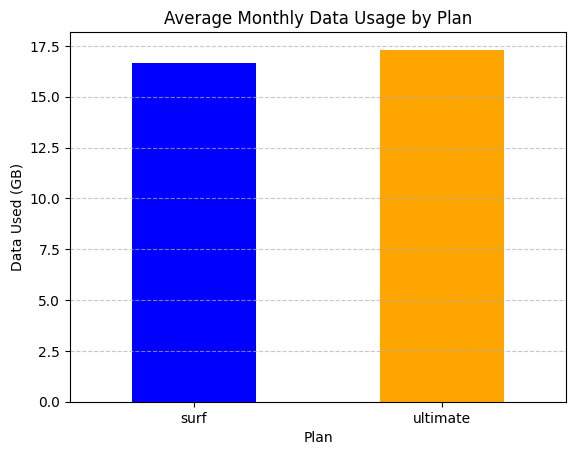

In [58]:
# Calculate average GB used per plan
internet_means = merged_monthly_usage.groupby('plan')['gb_used'].mean().round(2)

# Visualize Internet usage
internet_means.plot(kind='bar', color=['blue', 'orange'])

plt.title('Average Monthly Data Usage by Plan')
plt.xlabel('Plan')
plt.ylabel('Data Used (GB)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=0)
plt.show()

__Internet Usage:__

- Ultimate users use slightly more data on average (17.31 GB vs. 16.67 GB).

- Data usage for users on both plans does not differ greatly - indicating that data usage behavior is similar across both plans. 
   * Because the usage is so similar, it is reasonable to deduce that Surf users likely hit and possibly exceed their limits more often, as the Surf plan has a lower data cap of 15 GB.
   * If this is the case, it could indicate frequent overages — leading to additional charges.

__Summary:__ Plan choice doesn't heavily influence data habits.

* The similarity in usage suggests users tend to use the data they need, regardless of plan limits — they either pay for overages or adjust their habits slightly.


<div style="background-color: #f8d7da; color: #721c24; padding: 15px; border-radius: 4px; border: 1px solid #f5c6cb;"> 

<b>Reviewer's comment v1:</b>
    
However, could you please complete the same analysis for the internet?

<div style="background-color: #d4edda; color: #155724; padding: 15px; border-radius: 4px; border: 1px solid #c3e6cb;">

<b>Reviewer's comment v2:</b>
    
I will write overall thoughts about the data analysis section:
- Very nice visualization of the data. It's great that you combined both plans in one graph for comparison and also used different graph types to check the available data.
- If you have time and are willing to practice, you can display two charts (a histogram and a boxplot) using a two-column subplot.

```
    # Create one row with 2 columns
	  fig, axes = plt.subplots(1, 2, figsize=(16, 5))

	  # Create a histogram for the surf plan
	  sns.distplot(... ax=axes[0])
	  # Create a histogram for the second plan
	  sns.distplot(... ax=axes[0])
	
	  # Create a boxplot for both plans
	  sns.boxplot(... ax=axes[1])
```

## Test statistical hypotheses

[Test the hypothesis that the average revenue from users of the Ultimate and Surf calling plans differs.]

Test the hypothesis that the average revenue from users of the Ultimate and Surf calling plans differs.

__Approach:__ We will use a two-sample t-test because we are comparing two independent groups (Surf vs Ultimate users) against each other. 

1. __Null Hypothesis (H₀):__ There is no difference in average revenue between Ultimate and Surf plans.

2. __Alternative Hypothesis (H₁):__ There is a difference in average revenue between Ultimate and Surf plans.

In [59]:
merged_monthly_usage

,user_id,month,calls_made,total_minutes,messages,mb_used,gb_used,plan,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,monthly_revenue,revenue
0,1000,2018-12,16,124.0,11,1901,2.0,ultimate,1000,30720,3000,70,7,0.01,0.01,ultimate,70.00,70.00
1,1001,2018-08,27,182.0,30,6919,7.0,surf,50,15360,500,20,10,0.03,0.03,surf,20.00,20.00
2,1001,2018-09,49,315.0,44,13314,14.0,surf,50,15360,500,20,10,0.03,0.03,surf,20.00,20.00
3,1001,2018-10,65,393.0,53,22330,22.0,surf,50,15360,500,20,10,0.03,0.03,surf,90.09,90.09
4,1001,2018-11,64,426.0,36,18504,19.0,surf,50,15360,500,20,10,0.03,0.03,surf,60.00,60.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2288,1349,2018-12,0,0.0,61,13039,13.0,surf,50,15360,500,20,10,0.03,0.03,surf,20.33,20.33
2289,1361,2018-05,0,0.0,2,1519,2.0,surf,50,15360,500,20,10,0.03,0.03,surf,20.00,20.00
2290,1482,2018-10,0,0.0,2,0,0.0,ultimate,1000,30720,3000,70,7,0.01,0.01,ultimate,70.00,70.00
2291,1108,2018-12,0,0.0,0,233,1.0,ultimate,1000,30720,3000,70,7,0.01,0.01,ultimate,70.00,70.00


In [60]:
from scipy import stats as st

# Separate revenue data for each plan
surf_revenue = merged_monthly_usage[merged_monthly_usage['plan'] == 'surf']['monthly_revenue']
ultimate_revenue = merged_monthly_usage[merged_monthly_usage['plan'] == 'ultimate']['monthly_revenue']

# Run two-sided t-test, assuming unequal variances

alpha = 0.05  # Set alpha value (significance level)

result = st.ttest_ind(surf_revenue, ultimate_revenue, equal_var=False)
t_statistic = result[0]
p_value = result[1]

print("Hypothesis Test Results for Plan Revenue Difference:")
print(f"t-statistic: {t_statistic:.4f}")
print(f"p-value: {p_value}")

# Compare p-value with the statistical significance level
if p_value < alpha:
    print("We reject the null hypothesis")
else:
    print("We fail to reject the null hypothesis")

Hypothesis Test Results for Plan Revenue Difference:
t-statistic: -7.9521
p-value: 3.1703905481135734e-15
We reject the null hypothesis


__The goal:__ To determine whether the average monthly revenue differs between users of the Surf and Ultimate plans.

We used a two-sided t-test because we are comparing two independent groups (Surf vs. Ultimate users). We're working with continuous data (revenue) and we want to know if there's a significant difference. Their variances are unequal (Surf has much higher spread), and the t-test is designed to handle unequal sample sizes and variances. 

__Results Criteria__
* alpha = 0.05
   - If the p-value < alpha: reject reject the null hypothesis
   - If the p-value ≥ alpha: fail to reject the null hypothesis
      * Since p-value < 0.05, we reject the null hypothesis.
    
__Findings:__ In summary, there is strong statistical evidence that the average monthly revenue differs between Surf and Ultimate users.

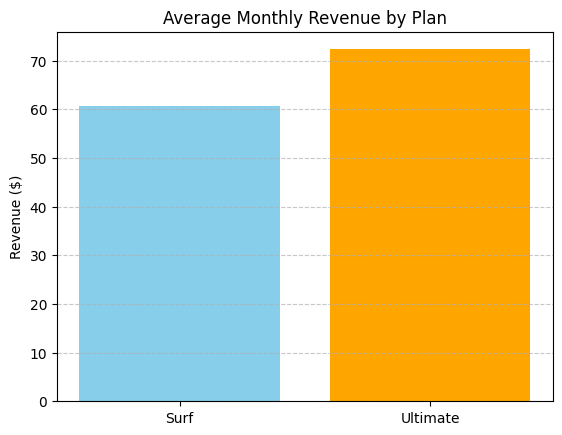

In [61]:
# Visualize monthly revenue by plan

# Calculate average revenue
surf_avg = surf_revenue.mean()
ultimate_avg = ultimate_revenue.mean()

# Plot bar chart
plt.bar(['Surf', 'Ultimate'], [surf_avg, ultimate_avg], color=['skyblue', 'orange'])
plt.title('Average Monthly Revenue by Plan')
plt.ylabel('Revenue ($)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Test the hypothesis that the average revenue from users in the NY-NJ area is different from that of the users from the other regions.

In [62]:
merged_monthly_usage.head()
users['city'].tail(10)

490          Sacramento–Roseville–Folsom, CA MSA
491                Grand Rapids-Kentwood, MI MSA
492      Portland-Vancouver-Hillsboro, OR-WA MSA
493           Boston-Cambridge-Newton, MA-NH MSA
494    New York-Newark-Jersey City, NY-NJ-PA MSA
495    New York-Newark-Jersey City, NY-NJ-PA MSA
496                 New Orleans-Metairie, LA MSA
497       Los Angeles-Long Beach-Anaheim, CA MSA
498    New York-Newark-Jersey City, NY-NJ-PA MSA
499            Orlando-Kissimmee-Sanford, FL MSA
Name: city, dtype: object

__Note:__ Megaline has New York and New Jersey grouped as one metro area, so I will create a new variable with NY_NJ and another for all other regions. 

__Goal:__ Test whether the average monthly revenue from users in the NY–NJ area is statistically different from users in all other regions.

__Null Hypothesis (H₀):__ There is no difference in average revenue between NY–NJ users and other users.

__Alternative Hypothesis (H₁):__ There is a difference in average revenue.

I will again use the t-test, because it compares the mean (average revenue) from two independent groups (NY-NJ to users in all other areas), and determines if the observed difference in revenue is statistically significant rather than due to random variation. I set my alpha value to 0.05 again because it provides a 95% confidence level and is the standard. 

In [63]:
# Test the hypotheses

# Merge region info into the revenue data
merged_regional = merged_monthly_usage.merge(users[['user_id', 'city']], on='user_id')

# Separate revenue data by region
ny_nj_revenue = merged_regional[merged_regional['city'] == 'New York-Newark-Jersey City, NY-NJ-PA MSA']['monthly_revenue']
other_revenue = merged_regional[merged_regional['city'] != 'New York-Newark-Jersey City, NY-NJ-PA MSA']['monthly_revenue']

# Set alpha (significance level)
alpha = 0.05

# Run two-sided Welch’s t-test
result = st.ttest_ind(ny_nj_revenue, other_revenue, equal_var=False)
t_statistic = result[0]
p_value = result[1]

print("Hypothesis Test Results: NY–NJ vs Other Regions")
print(f"t-statistic: {t_statistic:.4f}")
print(f"p-value: {p_value:.4f}")

# Compare p-value with alpha
if p_value < alpha:
    print("We reject the null hypothesis — revenue is significantly different.")
else:
    print("We fail to reject the null hypothesis — no significant difference.")


Hypothesis Test Results: NY–NJ vs Other Regions
t-statistic: -2.1309
p-value: 0.0335
We reject the null hypothesis — revenue is significantly different.


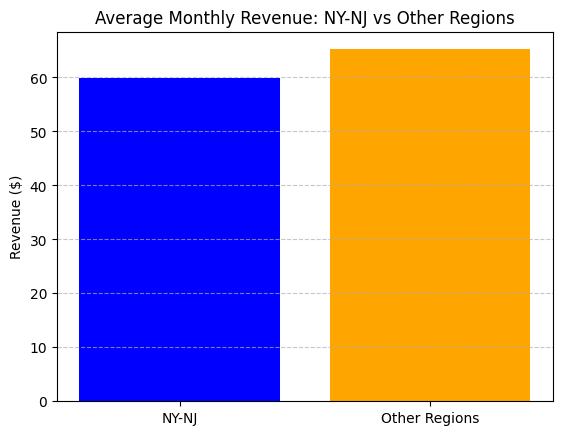

In [64]:
# Visualize monthly revenue by regional comparison
means = [ny_nj_revenue.mean(), other_revenue.mean()]
labels = ['NY-NJ', 'Other Regions']

plt.bar(labels, means, color=['blue', 'orange'])
plt.title('Average Monthly Revenue: NY-NJ vs Other Regions')
plt.ylabel('Revenue ($)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

__Findings:__ The hypothesis test showed a statistically significant difference in average monthly revenue between users in the NY–NJ area and those in other regions, indicating that region has a potential impact on user spending behavior. Region impacts revenue, and users outside NY–NJ bring in more average monthly revenue. 

<div style="background-color: #d4edda; color: #155724; padding: 15px; border-radius: 4px; border: 1px solid #c3e6cb;">

<b>Reviewer's comment v1:</b>
    
- Everything is correct here 💫 Hypotheses have been correctly calculated and tested.  
- Your conclusions based on the results are also correct.
- You can also additionally compare the variances of the samples before testing hypotheses in order to understand with which equal_var parameter to use the ttest_ind test method (by default, True). Here you can manually calculate variances, or use Levene's statistic test (https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.levene.html) or Barlett's test (https: //docs.scipy .org / doc / scipy / reference / generated / scipy.stats.bartlett.html # scipy.stats.bartlett)
    

## General conclusion


__Analysis Recap:__
  * Based on a 2018 sample of 500 Megaline clients, we analyzed their call, text, and internet usage across the company’s two prepaid plans: Surf and Ultimate.
  * Our aim was to study the data to gain insight into client's behavior across both plans in order to determine which plan brings in more revenue.
  * These findings can help the commercial department make data-driven decisions to optimize their advertising budget and maximize overall profitability.

__Data Comparison Results:__

1. Average Call Duration Is Similar Across Plans
  * We assumed that call behavior might differ based on the plan type, but statistical analysis showed that users on both the Surf and Ultimate plans make about the same number of monthly call minutes.
  * This justified treating call behavior as consistent across plans.

2. Text Messaging Usage Is Low and Similar for All Users
  * Message counts were low for both Surf and Ultimate users, with averages well below each plan's limit. This supported the assumption that text messaging is not a major driver of revenue or plan selection.

3. Internet Usage Shows More Variation, especially on the Surf Plan
  * Although average internet usage was similar across plans, Surf users were more likely to exceed their data limits, incurring overage charges. 

__Average Monthly Revenue by plan:__ 
  * Ultimate plan users consistently bring in more monthly revenue, making it the most reliable plan for profitability per user.
  * This supports strategies that retain Ultimate users or upsell high-usage Surf users who regularly pay more than $70.

__Regional Revenue Comparison:__ 
  * Findings show that region has an impact on revenue.
  * Megaline can adjust marketing or plan recommendations by region to increase profitability.

__Which Plan Brings More Revenue:__

  * Based on the sample we were provided, the Surf Plan brings in more total revenue for Megaline, despite a lower base price.
  * The contributing factors include:
     - Larger customer base. 
     - Many go over their plan limits and pay extra (especially for calls and data).
     - Revenue is less predictable, but higher in peak cases.

<div style="background-color: #d4edda; color: #155724; padding: 15px; border-radius: 4px; border: 1px solid #c3e6cb;">

<b>Reviewer's comment v1:</b>

    
Overall, you conducted excellent research with accurate interim findings, clean code, and clear visualizations.

I also appreciate your overall conclusions. They are well-structured and provide valuable insights into what you achieved, as well as recommendations for the business.